[View in Colaboratory](https://colab.research.google.com/github/iiwakuralain/TCC2/blob/master/MLP_regressor_multi_input.ipynb)

In [0]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
!pip install -q xlrd
!git clone https://github.com/iiwakuralain/TCC2

fatal: destination path 'TCC2' already exists and is not an empty directory.


In [4]:
cd TCC2

/content/TCC2


In [5]:
ls

db_ok.csv     MLP_regressor_multi_input.ipynb   TCC2/
linear.ipynb  MLP_regressor_single_input.ipynb


In [0]:
import pandas as pd
df = pd.read_csv('db_ok.csv')

In [0]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [0]:
joinville = df.loc[(df['cidade'] == 1)]

In [9]:
joinville.head()

,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
0,1,58.652928,18054.0,15045.00000,297.782896,256.508935
1,1,148.766748,45000.0,38160.00000,297.782896,256.508935
2,1,17.855129,5000.0,4580.00000,297.782896,256.508935
3,1,120.552592,35898.5,30922.81693,297.782896,256.508935
4,1,14.619374,4375.0,3750.00000,297.782896,256.508935


In [10]:
joinville.shape

(95, 6)

In [11]:
mydf = joinville.astype('int64')
print(mydf.info()) # Overview of dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 6 columns):
cidade     95 non-null int64
m2Aprox    95 non-null int64
4mm        95 non-null int64
3mm        95 non-null int64
$4mm       95 non-null int64
$3mm       95 non-null int64
dtypes: int64(6)
memory usage: 5.2 KB
None


In [12]:
df_joinville = mydf.drop(['3mm'], axis=1)
y = mydf['3mm']

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_joinville, y, test_size=0.30)
print(X_train.shape, y_train.shape)

((66, 5), (66,))


In [0]:
from sklearn.neural_network import MLPRegressor

In [0]:
clf = MLPRegressor(solver='lbfgs',
                    hidden_layer_sizes=(10), random_state=1)

In [15]:
clf.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [0]:
predictions = clf.predict(X_test)

In [17]:
buildCompareT = {'cidade':X_test['cidade'],'m2Aprox': X_test['m2Aprox'], 'yTest': y_test, 'yPredicted':predictions.astype('int64')}
compareT = pd.DataFrame(data=buildCompareT)
compareT

,cidade,m2Aprox,yPredicted,yTest
3,1,120,32559,30922
0,1,58,17457,15045
92,1,624,159994,160061
36,1,224,54057,57663
34,1,143,37976,36880
5,1,141,37880,36366
47,1,55,16119,14300
79,1,20,7480,5300
61,1,18,6897,4575
62,1,122,32917,30500


Text(0,0.5,u'Predictions')

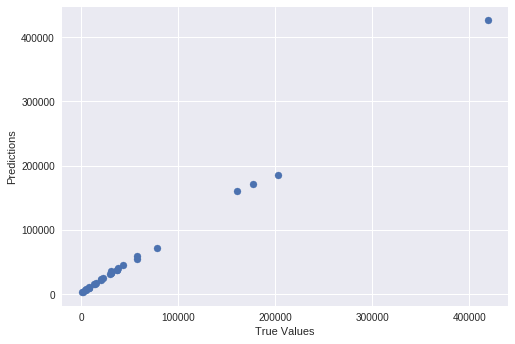

In [18]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [19]:
r2_score(y_test, predictions)

0.9971797401701862

In [20]:
mean_squared_error(y_test, predictions)

20743251.18172138

In [21]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions)

3202.0186950686107

In [22]:
"""
Regression metrics
See the Regression metrics section of the user guide for further details.

metrics.explained_variance_score(y_true, y_pred)	Explained variance regression score function
metrics.mean_absolute_error(y_true, y_pred)	Mean absolute error regression loss
metrics.mean_squared_error(y_true, y_pred[, …])	Mean squared error regression loss
metrics.mean_squared_log_error(y_true, y_pred)	Mean squared logarithmic error regression loss
metrics.median_absolute_error(y_true, y_pred)	Median absolute error regression loss
metrics.r2_score(y_true, y_pred[, …])	R^2 (coefficient of determination) regression score function.
"""
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

print 'explained_variance_score: '
explained_variance_score(y_test, predictions)


explained_variance_score: 


0.9972884165524276

In [23]:

print 'mean_absolute_error: '
mean_absolute_error(y_test, predictions)



mean_absolute_error: 


3202.0186950686107

In [24]:

print 'mean_squared_error: '
mean_squared_error(y_test, predictions)



mean_squared_error: 


20743251.18172138

In [25]:
print 'median_absolute_error: '
median_absolute_error(y_test, predictions)



median_absolute_error: 


2244.795054168095

In [26]:
print 'r2_score: '
r2_score(y_test, predictions)

r2_score: 


0.9971797401701862

In [27]:
compareT['yPredicted']-compareT['yTest']

3      1637
0      2412
92      -67
36    -3606
34     1096
5      1514
47     1819
79     2180
61     2322
62     2417
64     1739
27     1432
41    -5797
50     3714
22     2974
81     2256
63     1874
38     6820
23   -18495
42     1842
33     2244
54     2092
78     2004
4      2231
19     5245
39     2469
11    -5504
21     2917
75     2127
dtype: int64